# Function API using Keras


The Functional API in TensorFlow and Keras provides a more flexible and powerful way to define complex neural network architectures compared to the Sequential API. 

Instead of creating models by adding layers sequentially, the Functional API allows you to build models by defining a computational graph of interconnected layers.



## The Functional API can handle models with Non-Linear topology such as:


* **Multiple Inputs and Outputs**: The Functional API supports models with multiple inputs and outputs, making it suitable for tasks such as multi-input/multi-output architectures, siamese networks, and models with auxiliary outputs.

* **Shared Layers**: You can easily reuse layers by calling them multiple times and connecting their outputs to different parts of the computational graph.

* **Non-Sequential Connections**: With the Functional API, you can create non-sequential connections between layers, allowing for more complex network architectures such as skip connections (residual connections) and dense connections (as in DenseNet).

* **Model Branching**: You can create branches in the model architecture, where different parts of the input data flow through different paths of the network before being merged or concatenated.

* **Model Subclassing**: The Functional API enables you to define custom layers and models using the subclassing API, providing more flexibility and control over the model's behavior.


The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

In [1]:
from keras.models import Model

2024-04-23 08:29:42.228269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 08:29:42.228393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 08:29:42.373247: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from keras.layers import *

Let's assume our input is a tabluar data that has 3 input columns:

## Simple Model Architecture

#### **Input Layers**

In [4]:
x = Input(shape = (3,))

#### **Dense Layers**

In [6]:
# Hidden1 is connected with X (input layer)
hidden1 = Dense(128, activation = "relu")(x)

# Hidden2 is connected with Hidden1
hidden2 = Dense(64, activation = "relu")(hidden1)

#### **Branching (For Non-Linearity)**

In [7]:
# Output for Regression Part of Problem
output1 = Dense(1, activation = "linear")(hidden2)

# Output for Classification Part of Problem
output2 = Dense(1, activation = "sigmoid")(hidden2)

In [8]:
model = Model(inputs = x, outputs = [output1, output2])

In [9]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         65 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from keras.utils import plot_model

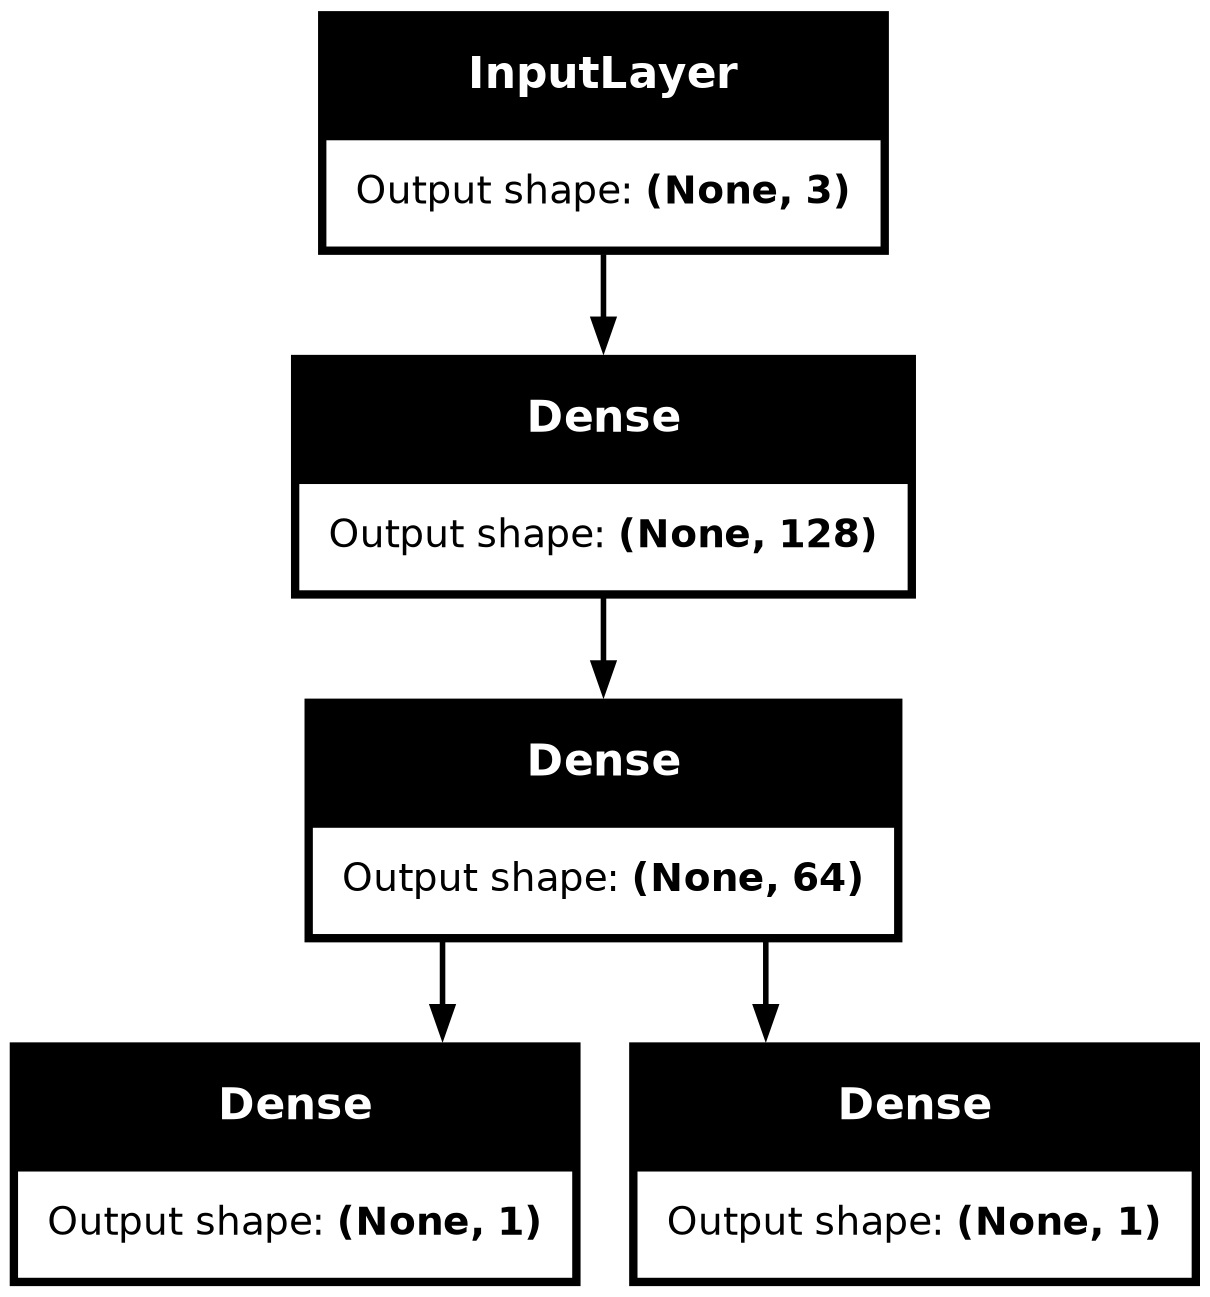

In [12]:
plot_model(model, show_shapes = True)

## Complex Model Architecture

#### **Defining the Set of Inputs Layers**

In [13]:
input_A = Input(shape=(32,))
input_B = Input(shape = (128,))

#### **First Branching**

In [14]:
x = Dense(8, activation = "relu")(input_A)
x1 = Dense(4, activation = "relu")(x)

#### **Second Branching**

In [15]:
y = Dense(64, activation = "relu")(input_B)
y1 = Dense(64, activation = "relu")(y)
y2 = Dense(64, activation = "relu")(y1)

#### **Combining Outputs**

In [16]:
combined_model = concatenate([x1,y2])

#### **Applying Fully Connected Layer and then performing Regression Prediction**

In [17]:
z = Dense(2, activation = "relu")(combined_model)
z1 = Dense(1, activation = "linear")(z)

#### **Model will accept inputs from two branches and then ouput a Single Value**

In [18]:
complex_model = Model(inputs = [input_A, input_B], outputs = z1)

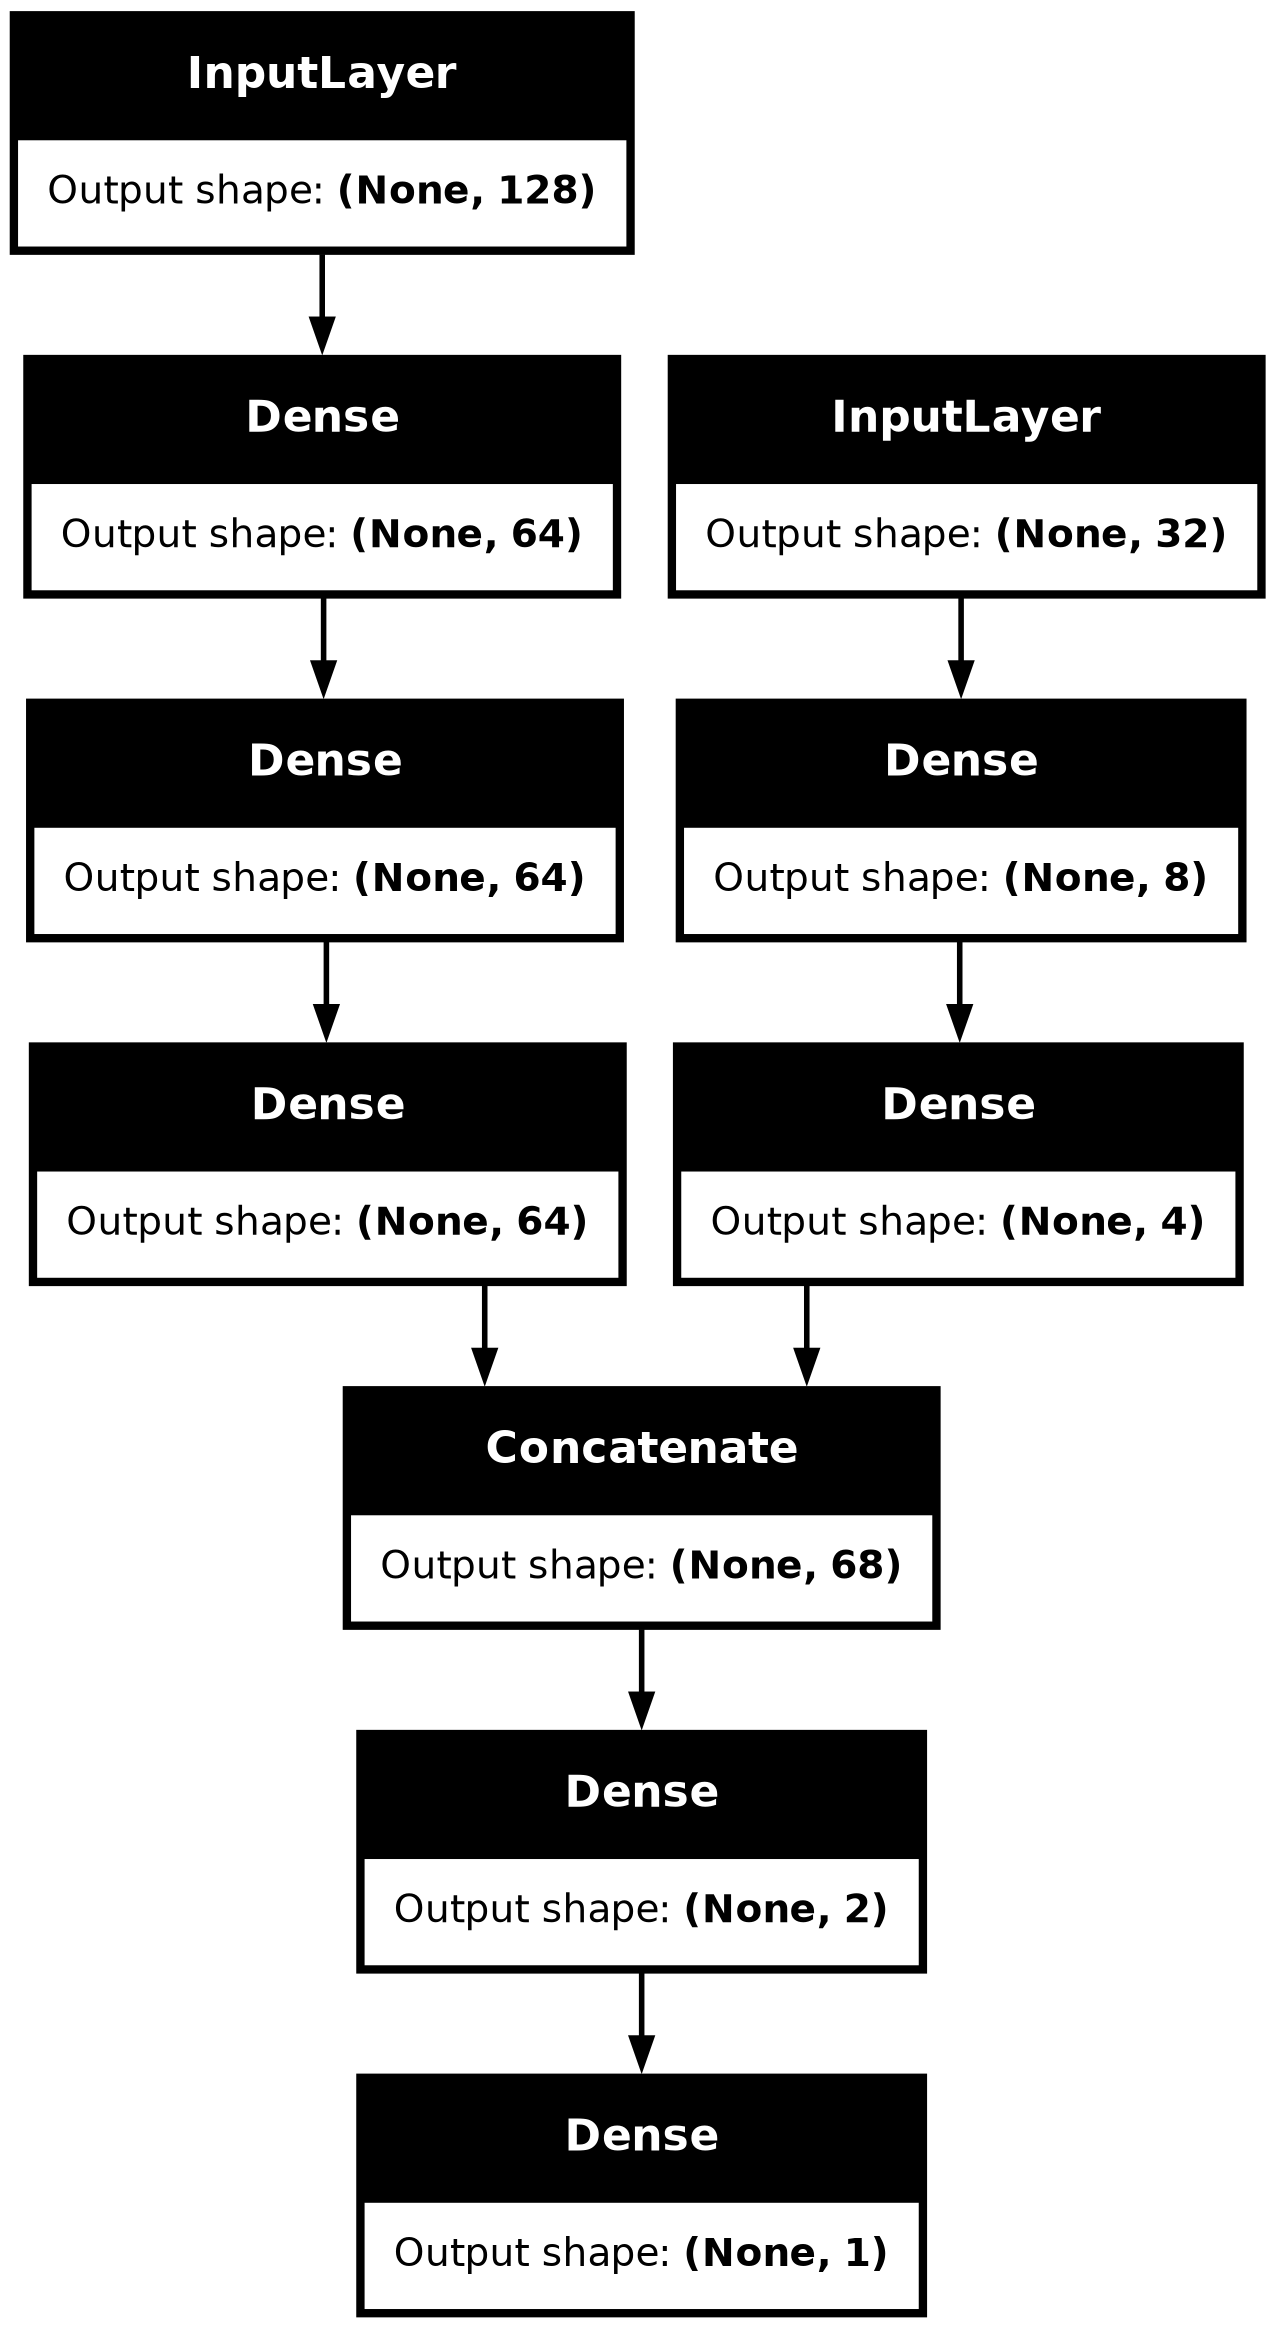

In [20]:
plot_model(complex_model, show_shapes = True)

### Conclusion


The Functional API provides a more flexible and expressive way to define neural network architectures, making it suitable for a wide range of deep learning tasks.

> Stay tuned for more and Don't forget to **Star** this Github Repository for more such contents.